<a href="https://colab.research.google.com/github/Gabriel4474/trabalho5naAfonso/blob/main/Trabalho5NA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install firebase_admin

In [2]:
import os

os.makedirs('/content/bronze', exist_ok=True)
os.makedirs('/content/prata', exist_ok=True)
os.makedirs('/content/ouro', exist_ok=True)

os.listdir('/content/')

['.config', 'prata', 'ouro', 'bronze', 'chave.json', 'sample_data']

In [3]:
import firebase_admin
from firebase_admin import credentials, storage
import pandas as pd

cred = credentials.Certificate("chave.json")
firebase_admin.initialize_app(cred, {
    'storageBucket': 'gabrielsantos5na.appspot.com'
})

bucket = storage.bucket()

In [4]:
blobs = bucket.list_blobs()

for blob in blobs:
    print(blob.name)

bronze/
bronze/data1.csv
bronze/data2.csv
bronze/data3.csv
bronze/data4.csv
bronze/data5.csv
ouro/
ouro/data1_ouro.csv
ouro/data2_ouro.csv
ouro/data3_ouro.csv
ouro/data4_ouro.csv
ouro/data5_ouro.csv
prata/
prata/data1_prata.csv
prata/data2_prata.csv
prata/data3_prata.csv
prata/data4_prata.csv
prata/data5_prata.csv


In [5]:
def download_from_firebase_to_colab(file_name, folder, encoding="utf-8"):
    blob = bucket.blob(f"{folder}/{file_name}")
    file_path = f"/content/{folder}/{file_name}"
    blob.download_to_filename(file_path)
    print(f"Arquivo {file_name} baixado para {file_path}")
    return pd.read_csv(file_path, encoding=encoding)

df1 = download_from_firebase_to_colab("data1.csv", "bronze")
df2 = download_from_firebase_to_colab("data2.csv", "bronze")
df3 = download_from_firebase_to_colab("data3.csv", "bronze", encoding="latin1")
df4 = download_from_firebase_to_colab("data4.csv", "bronze")
df5 = download_from_firebase_to_colab("data5.csv", "bronze")


Arquivo data1.csv baixado para /content/bronze/data1.csv
Arquivo data2.csv baixado para /content/bronze/data2.csv
Arquivo data3.csv baixado para /content/bronze/data3.csv
Arquivo data4.csv baixado para /content/bronze/data4.csv
Arquivo data5.csv baixado para /content/bronze/data5.csv


In [6]:
def clean_data(df):

    df_cleaned = df.dropna()


    df_cleaned.columns = [col.lower().replace(" ", "_") for col in df_cleaned.columns]


    return df_cleaned

df1_silver = clean_data(df1)
df2_silver = clean_data(df2)
df3_silver = clean_data(df3)
df4_silver = clean_data(df4)
df5_silver = clean_data(df5)

print(df5_silver.head())

   gameid  teamid  season                 date location  goals    xgoals  \
0      81      89    2015  2015-08-08 15:45:00        h      1  0.627539   
1      81      82    2015  2015-08-08 15:45:00        a      0  0.674600   
2      82      73    2015  2015-08-08 18:00:00        h      0  0.876106   
3      82      71    2015  2015-08-08 18:00:00        a      1  0.782253   
4      83      72    2015  2015-08-08 18:00:00        h      2  0.604226   

   shots  shotsontarget  deep     ppda  fouls  corners  yellowcards  redcards  \
0      9              1     4  13.8261     12        1          2.0         0   
1      9              4    10   8.2188     12        2          3.0         0   
2     11              2    11   6.9000     13        6          3.0         0   
3      7              3     2  11.8462     13        3          4.0         0   
4     10              5     5   6.6500      7        8          1.0         0   

  result  
0      W  
1      L  
2      L  
3      W  
4

In [7]:
def save_to_silver(df, file_name):
    file_path = f"/content/prata/{file_name}"
    df.to_csv(file_path, index=False)
    print(f"{file_name} salvo na camada Prata")
    return file_path

save_to_silver(df1_silver, "data1_prata.csv")
save_to_silver(df2_silver, "data2_prata.csv")
save_to_silver(df3_silver, "data3_prata.csv")
save_to_silver(df4_silver, "data4_prata.csv")
save_to_silver(df5_silver, "data5_prata.csv")

data1_prata.csv salvo na camada Prata
data2_prata.csv salvo na camada Prata
data3_prata.csv salvo na camada Prata
data4_prata.csv salvo na camada Prata
data5_prata.csv salvo na camada Prata


'/content/prata/data5_prata.csv'

In [8]:
import pandas as pd

def transform_df1_to_gold(df):


    df['date'] = pd.to_datetime(df['date'], errors='coerce')


    df_gold = df.groupby(df['date'].dt.to_period('M')).agg({
        'homeGoals': 'sum',     # Soma dos gols do time da casa
        'awayGoals': 'sum',     # Soma dos gols do time visitante
        'homeProbability': 'mean', # Média da probabilidade do time da casa
        'drawProbability': 'mean', # Média da probabilidade de empate
    }).reset_index()

    df_gold.rename(columns={
        'date': 'periodo',
        'homeGoals': 'gols_casa',
        'awayGoals': 'gols_visitante',
        'homeProbability': 'prob_casa',
        'drawProbability': 'prob_empate',
    }, inplace=True)

    return df_gold




def transform_df2_to_gold(df):
    return df.drop_duplicates()


def transform_df3_to_gold(df):
    return df.drop_duplicates()

def transform_df4_to_gold(df):
    return df.drop_duplicates()

def transform_df5_to_gold(df):


    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    df_gold = df.groupby(df['date'].dt.to_period('M')).agg({
        'shots': 'sum',               # Exemplo: soma dos tiros totais
        'shotsOnTarget': 'sum',       # Se a coluna for diferente, altere o nome
        'goals': 'sum',               # Somando os gols
        'xGoals': 'sum',              # Somando os gols esperados (ou nome correto)
        'fouls': 'sum',               # Somando os faltas
        'corners': 'sum',             # Somando os escanteios
    }).reset_index()


    df_gold.rename(columns={
        'date': 'periodo',
        'shots': 'total_chutes',
        'shotsOnTarget': 'total_chutes_na_trave',
        'goals': 'total_gols',
        'xGoals': 'gols_esperados',
        'fouls': 'total_faltas',
        'corners': 'total_escanteios',
    }, inplace=True)

    return df_gold


df1_gold = transform_df1_to_gold(df1)
df2_gold = transform_df2_to_gold(df2)
df3_gold = transform_df3_to_gold(df3)
df4_gold = transform_df4_to_gold(df4)
df5_gold = transform_df5_to_gold(df5)

print(df1_gold.head())



   periodo  gols_casa  gols_visitante  prob_casa  prob_empate
0  2014-08        163             126   0.426702     0.263955
1  2014-09        264             215   0.459064     0.263640
2  2014-10        265             171   0.475394     0.235730
3  2014-11        282             208   0.460733     0.244081
4  2014-12        277             241   0.439419     0.254494


In [9]:
import os


def save_to_gold(df, filename):

    gold_folder = '/content/ouro'


    os.makedirs(gold_folder, exist_ok=True)


    file_path = os.path.join(gold_folder, filename)


    df.to_csv(file_path, index=False)
    print(f"Arquivo salvo em: {file_path}")

save_to_gold(df1_gold, 'data1_ouro.csv')
save_to_gold(df2_gold, 'data2_ouro.csv')
save_to_gold(df3_gold, 'data3_ouro.csv')
save_to_gold(df4_gold, 'data4_ouro.csv')
save_to_gold(df5_gold, 'data5_ouro.csv')

Arquivo salvo em: /content/ouro/data1_ouro.csv
Arquivo salvo em: /content/ouro/data2_ouro.csv
Arquivo salvo em: /content/ouro/data3_ouro.csv
Arquivo salvo em: /content/ouro/data4_ouro.csv
Arquivo salvo em: /content/ouro/data5_ouro.csv



Exibindo dados de: df1_ouro


,periodo,gols_casa,gols_visitante,prob_casa,prob_empate
0,2014-08,163,126,0.426702,0.263955
1,2014-09,264,215,0.459064,0.263640
2,2014-10,265,171,0.475394,0.235730
3,2014-11,282,208,0.460733,0.244081
4,2014-12,277,241,0.439419,0.254494


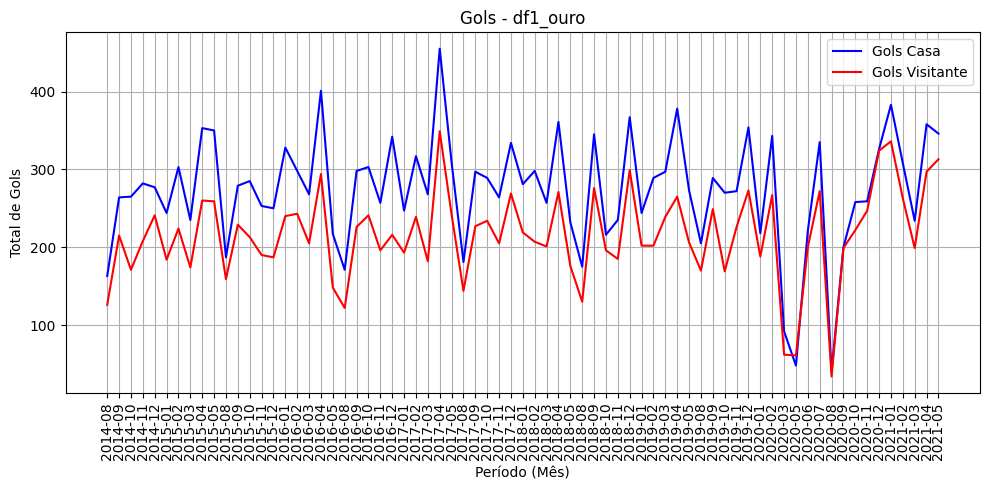

/content/ouro/data1_ouro.csv

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, FileLink

def display_df1_ouro():

    df = df1_gold

    print(f'\nExibindo dados de: df1_ouro')
    display(df.head())

    if 'periodo' in df.columns and 'gols_casa' in df.columns and 'gols_visitante' in df.columns:
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(df['periodo'].astype(str), df['gols_casa'], label='Gols Casa', color='blue')
        ax.plot(df['periodo'].astype(str), df['gols_visitante'], label='Gols Visitante', color='red')
        ax.set_xlabel('Período (Mês)')
        ax.set_ylabel('Total de Gols')
        ax.set_title('Gols - df1_ouro')
        ax.legend()
        ax.tick_params(axis='x', rotation=90)
        ax.grid(True)
        plt.tight_layout()
        plt.show()


    file_path = "/content/ouro/data1_ouro.csv"
    df.to_csv(file_path, index=False)
    display(FileLink(file_path))

display_df1_ouro()


In [ ]:
import pandas as pd
from IPython.display import display

def display_tables(df1, df2, df3, df4, df5):
    """
    Função para exibir as tabelas do df1, df2, df3, df4 e df5.
    """
    print("Exibindo dados de df1:")
    display(df1.head())

    print("Exibindo dados de df2:")
    display(df2.head())

    print("Exibindo dados de df3:")
    display(df3.head())

    print("Exibindo dados de df4:")
    display(df4.head())

    print("Exibindo dados de df5:")
    display(df5.head())

display_tables(df1, df2, df3, df4, df5)


Exibindo dados de df1:


,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,0.2843,0.3999,...,5.90,1.62,3.6,6.00,1.67,4.00,5.75,1.64,4.07,6.04
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0.3574,0.3500,...,4.27,1.91,3.5,4.00,2.00,3.50,4.20,1.82,3.88,4.70
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0.2988,0.4337,...,5.62,1.73,3.5,5.00,1.73,3.90,5.40,1.75,3.76,5.44
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,0.6422,0.2057,...,4.34,2.00,3.1,2.70,2.00,3.40,4.33,1.79,3.74,5.10
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0.1461,0.2159,...,3.08,2.60,3.1,2.88,2.60,3.25,3.00,2.46,3.39,3.14


Exibindo dados de df2:


,leagueID,name,understatNotation
0,1,Premier League,EPL
1,2,Serie A,Serie_A
2,3,Bundesliga,Bundesliga
3,4,La Liga,La_liga
4,5,Ligue 1,Ligue_1


Exibindo dados de df3:


,playerID,name
0,560,Sergio Romero
1,557,Matteo Darmian
2,548,Daley Blind
3,628,Chris Smalling
4,1006,Luke Shaw


Exibindo dados de df4:


,teamID,name
0,71,Aston Villa
1,72,Everton
2,74,Southampton
3,75,Leicester
4,76,West Bromwich Albion


Exibindo dados de df5:


,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D


In [ ]:
import firebase_admin
from firebase_admin import credentials, storage
import os


def upload_files_to_firebase(local_folder, firebase_folder):

    bucket = storage.bucket()

    for filename in os.listdir(local_folder):
        if filename.endswith('.csv'):
            local_file_path = os.path.join(local_folder, filename)


            firebase_file_path = os.path.join(firebase_folder, filename)


            blob = bucket.blob(firebase_file_path)
            blob.upload_from_filename(local_file_path)

            print(f"Arquivo {filename} enviado para {firebase_file_path} no Firebase.")

upload_files_to_firebase('/content/prata', 'prata/')

upload_files_to_firebase('/content/ouro', 'ouro/')

Arquivo data5_prata.csv enviado para prata/data5_prata.csv no Firebase.
Arquivo data4_prata.csv enviado para prata/data4_prata.csv no Firebase.
Arquivo data3_prata.csv enviado para prata/data3_prata.csv no Firebase.
Arquivo data1_prata.csv enviado para prata/data1_prata.csv no Firebase.
Arquivo data2_prata.csv enviado para prata/data2_prata.csv no Firebase.
Arquivo data1_ouro.csv enviado para ouro/data1_ouro.csv no Firebase.
Arquivo data3_ouro.csv enviado para ouro/data3_ouro.csv no Firebase.
Arquivo data2_ouro.csv enviado para ouro/data2_ouro.csv no Firebase.
Arquivo data4_ouro.csv enviado para ouro/data4_ouro.csv no Firebase.
Arquivo data5_ouro.csv enviado para ouro/data5_ouro.csv no Firebase.
